In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from math import sqrt

In [10]:
def grubbs_test(df, col, alpha):
    outliers = []
    data = df[col]
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) / sqrt(n) * sqrt(t_critical ** 2 / (n - 2 + t_critical ** 2))
    while True:
        G = np.abs(data - mean) / std  # calculated
        max_idx = np.argmax(G)
        if G[max_idx] > threshold and max_idx < len(df.index):
            outliers.append(max_idx)
            try:
                data = np.delete(data, max_idx)
                n -= 1
                mean = np.mean(data)
                std = np.std(data)
                threshold = (n - 1) / np.sqrt(n) * np.sqrt((t.ppf(1 - alpha / (2 * n), n - 2) ** 2) / (n - 2 + t.ppf(1 - alpha / (2 * n), n - 2) ** 2))
            except ValueError:
                break
        else:
            break
    return outliers

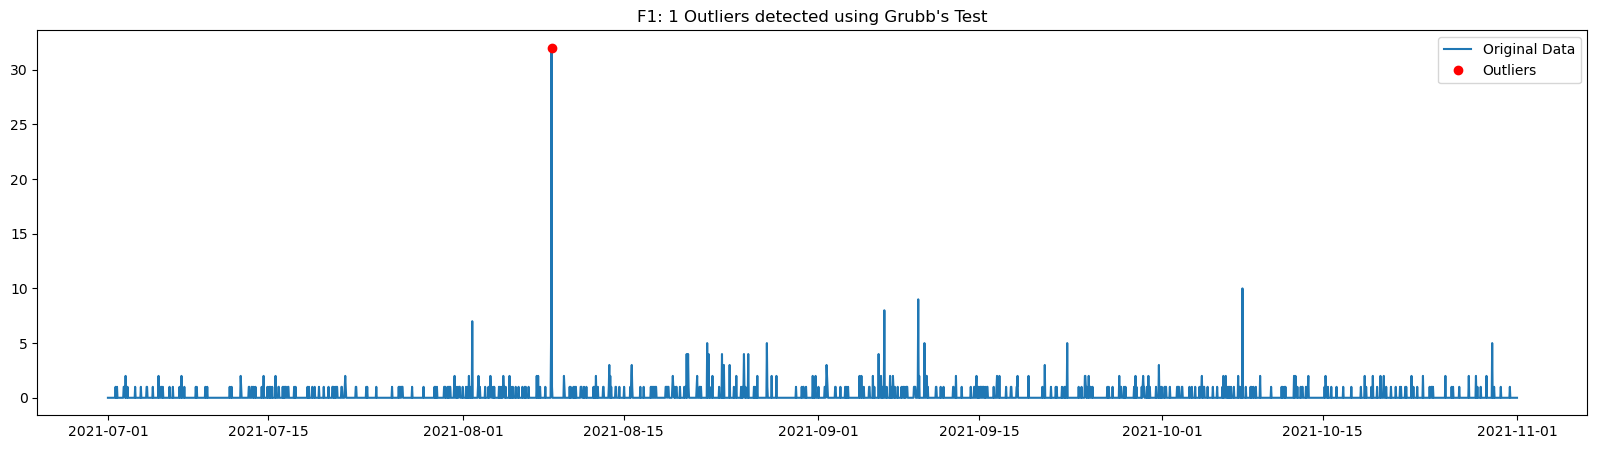

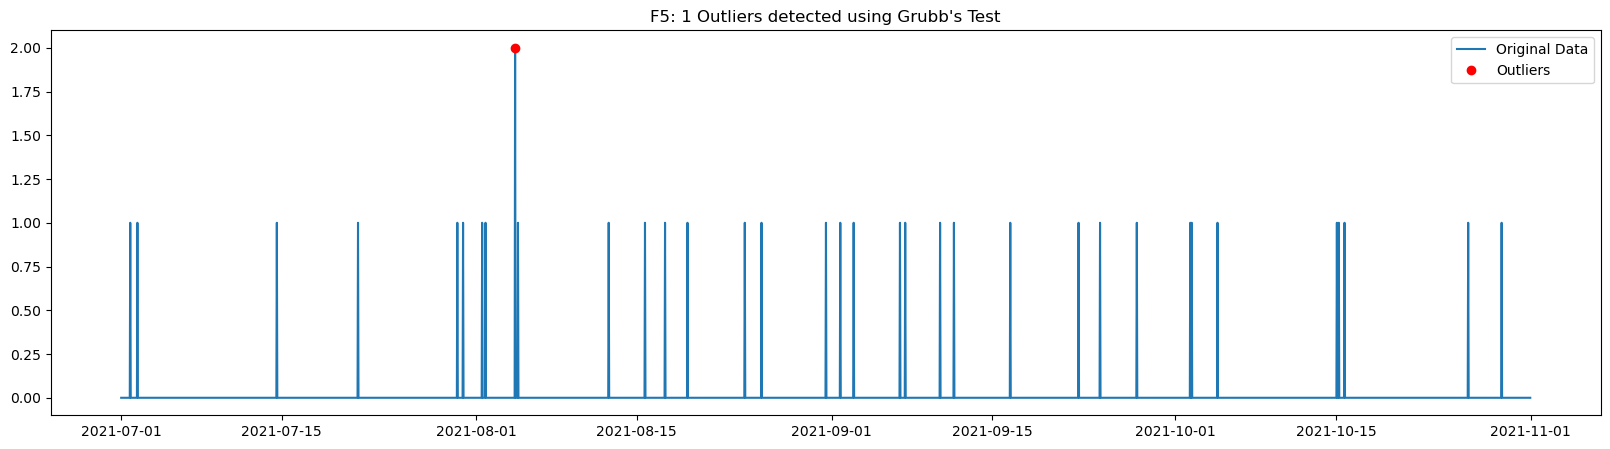

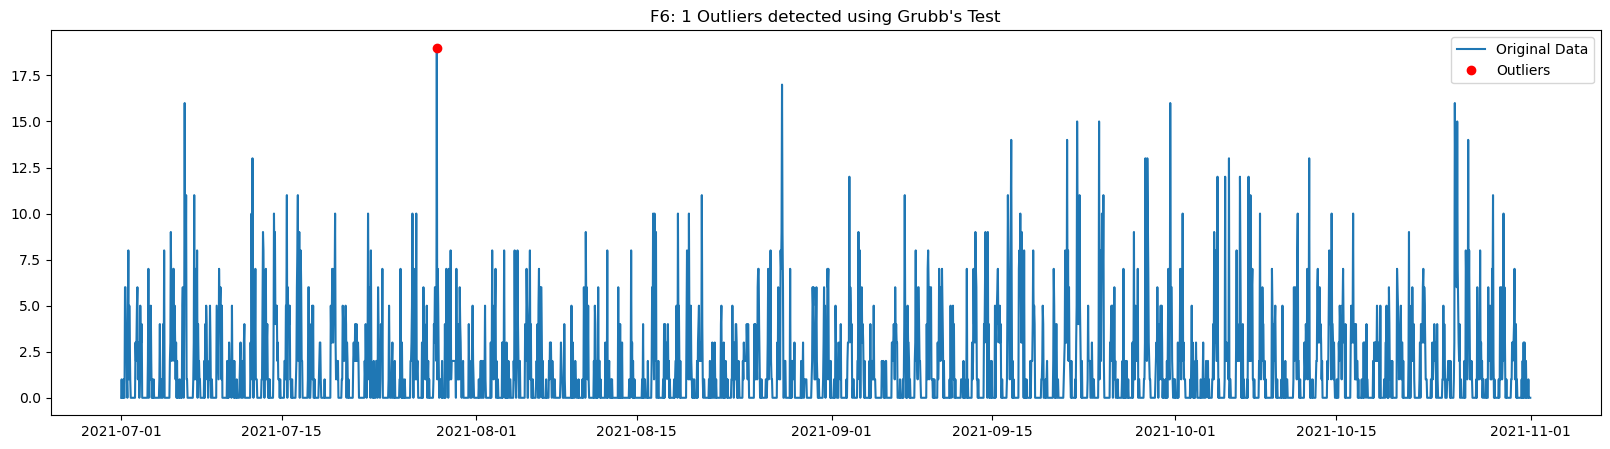

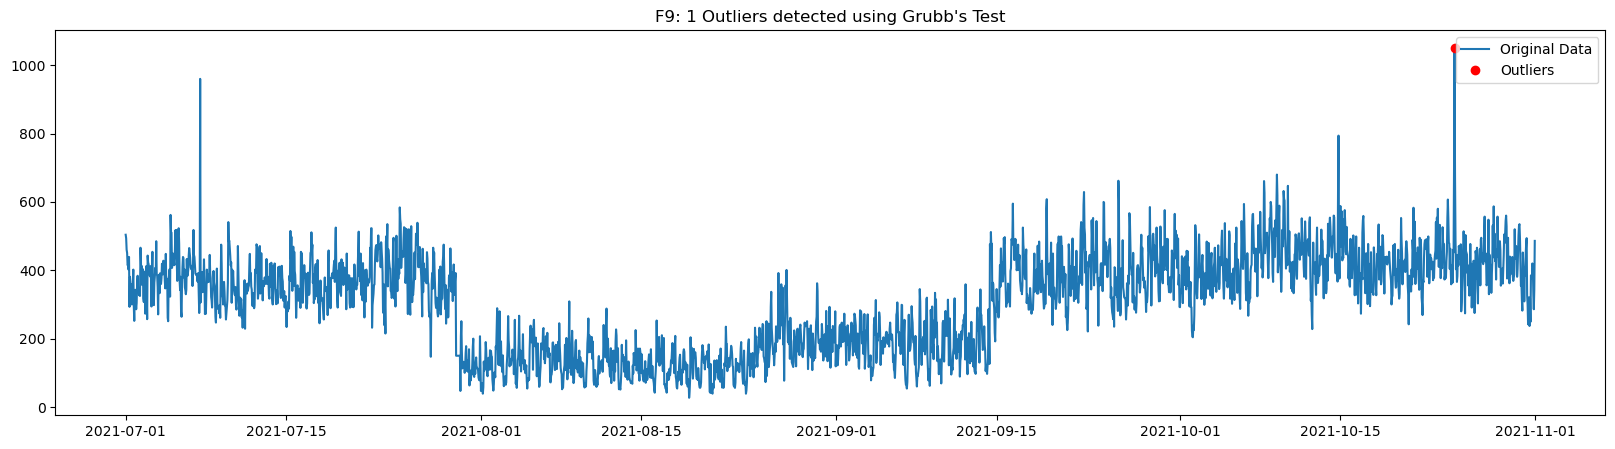

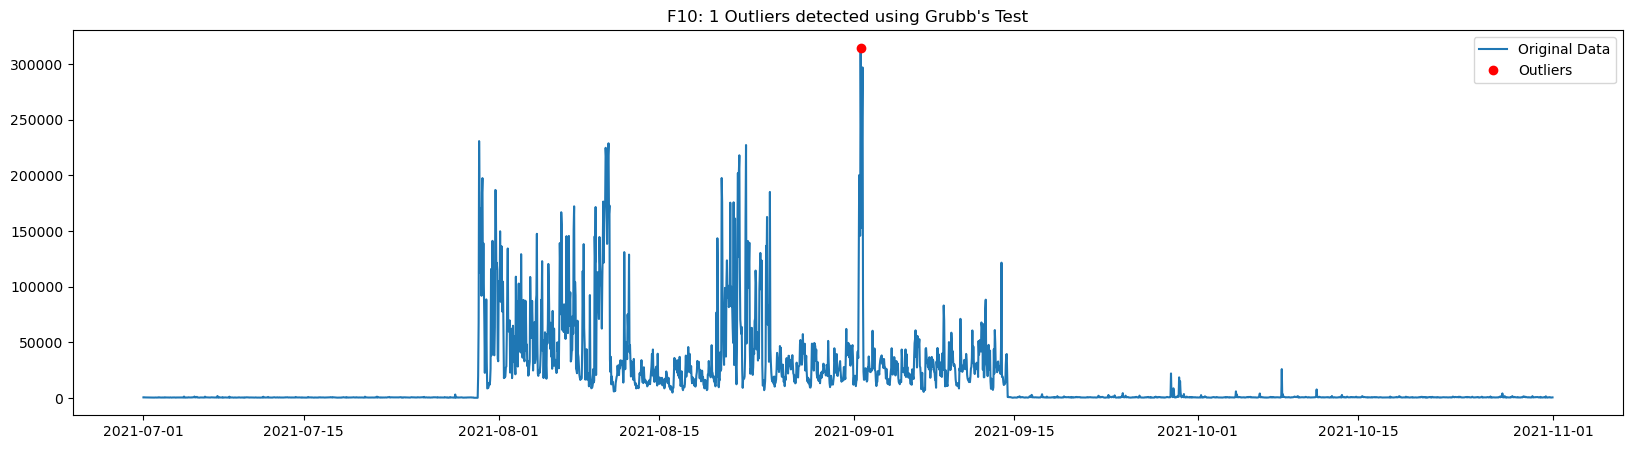

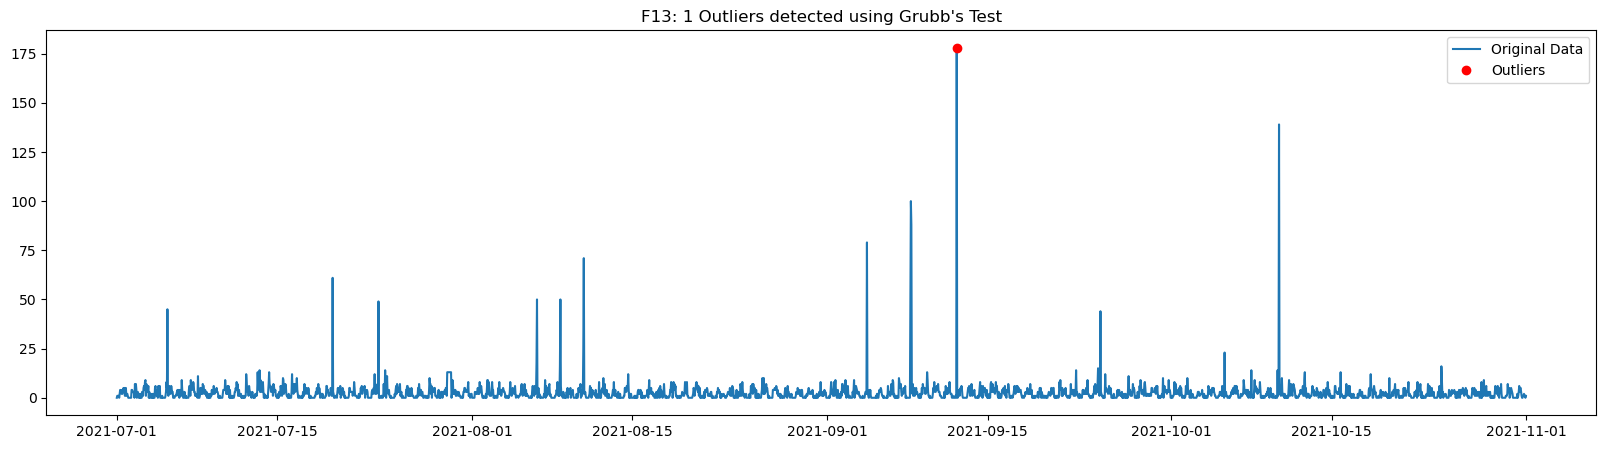

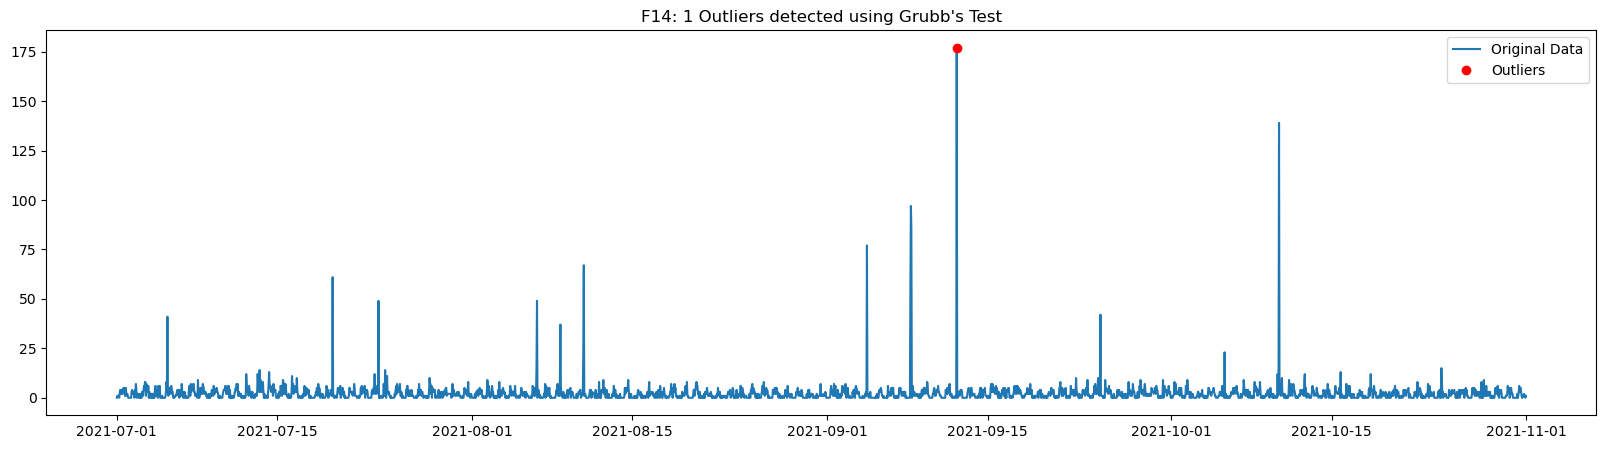

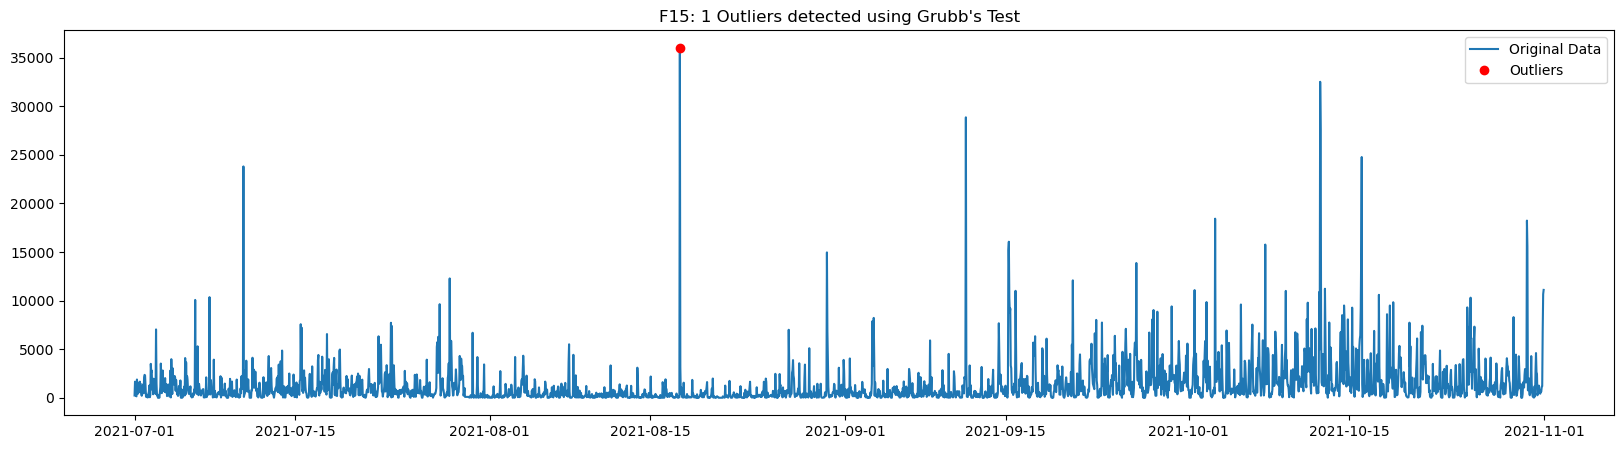

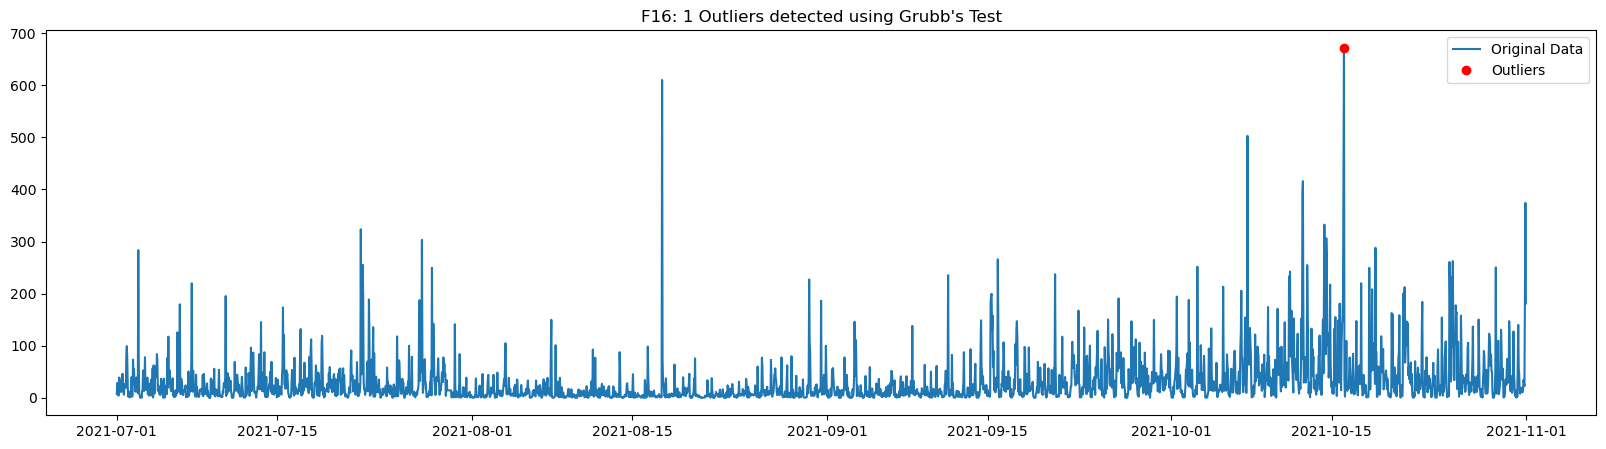

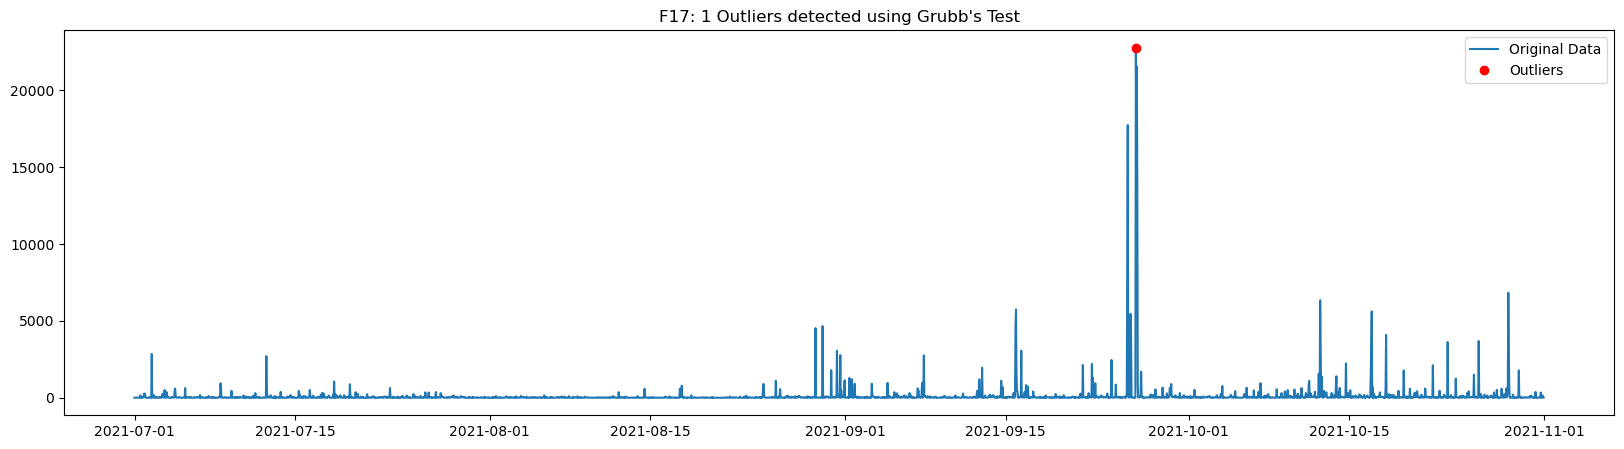

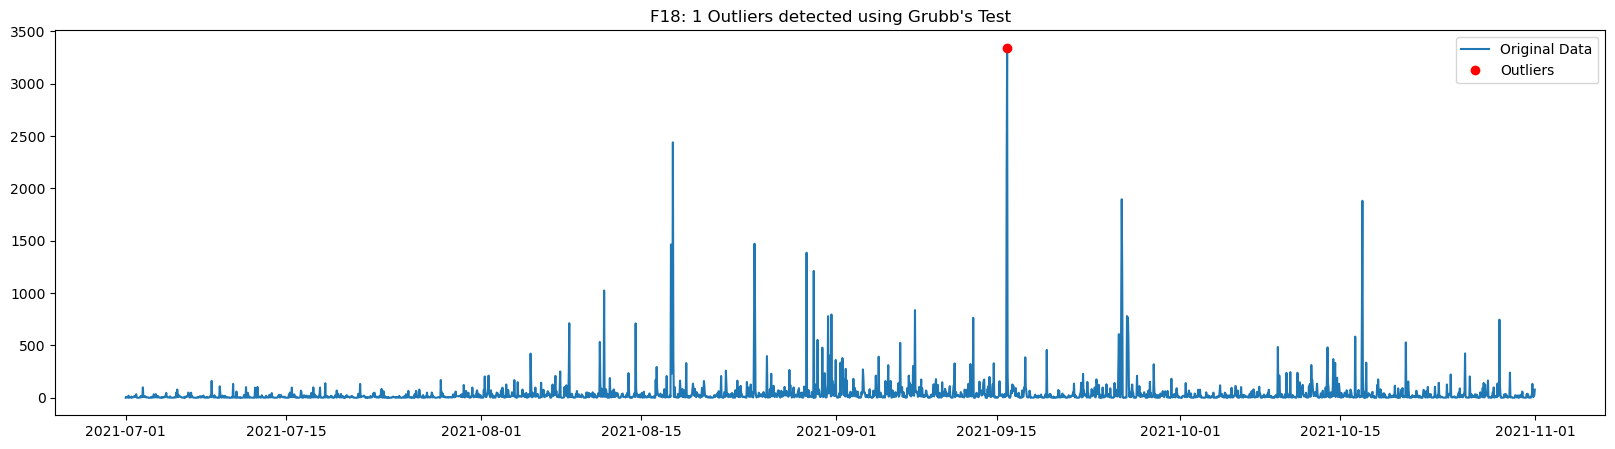

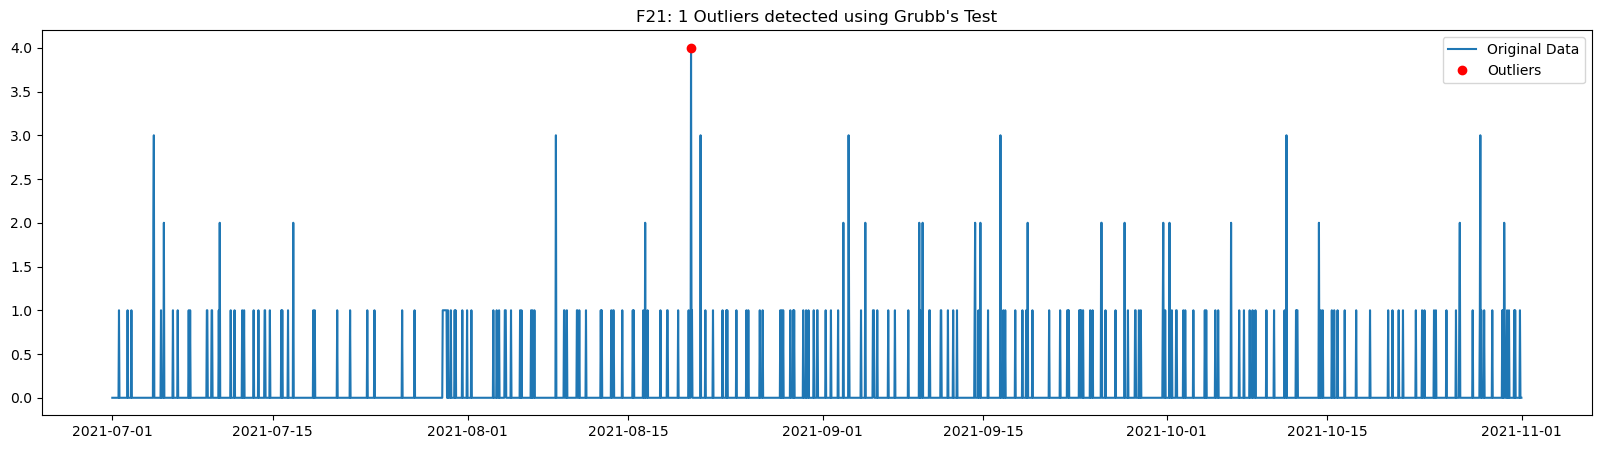

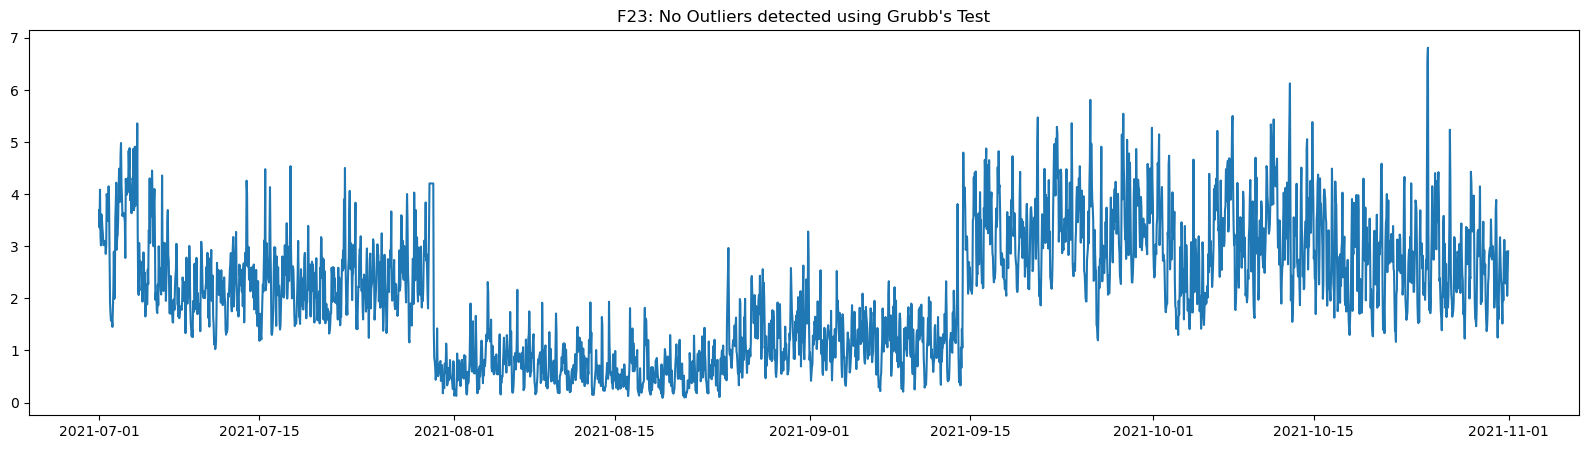

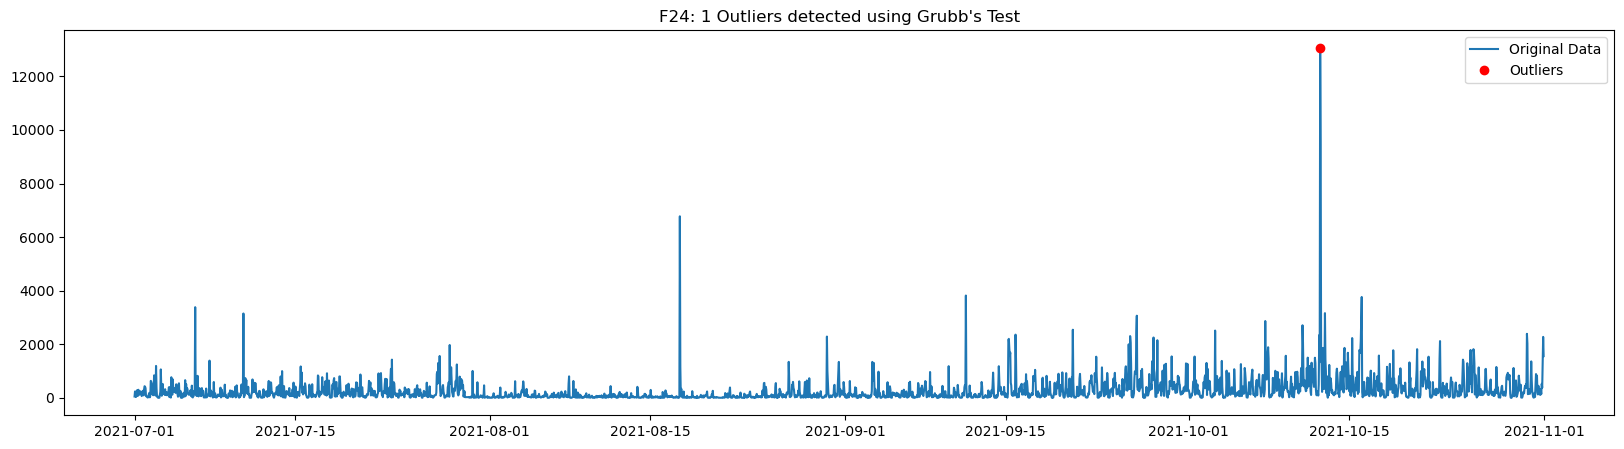

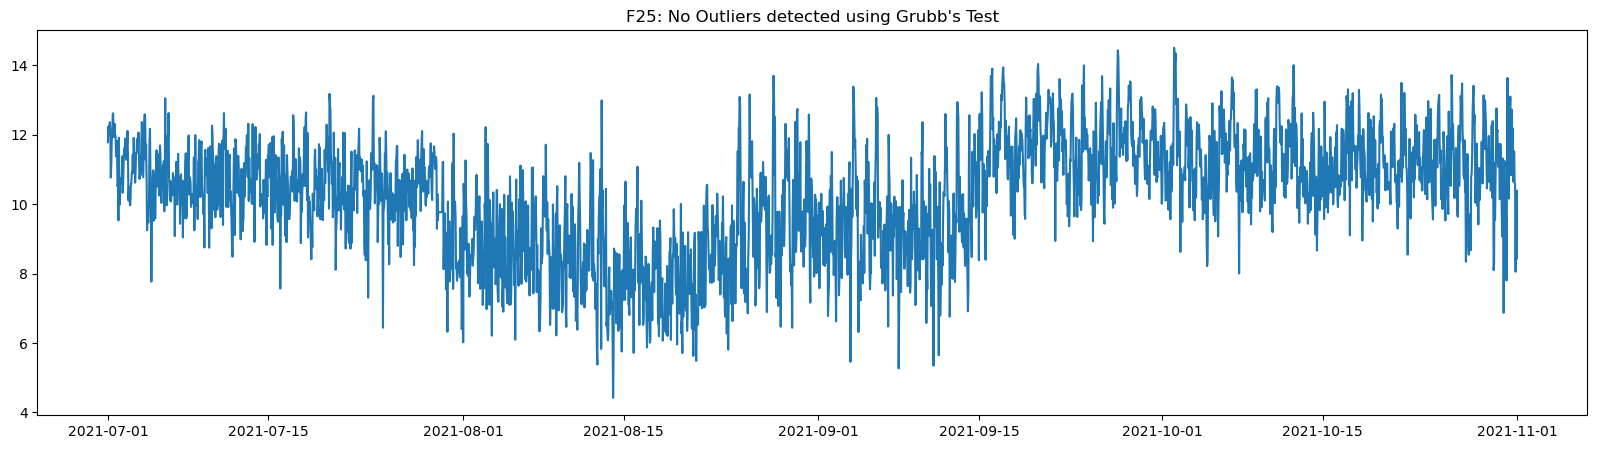

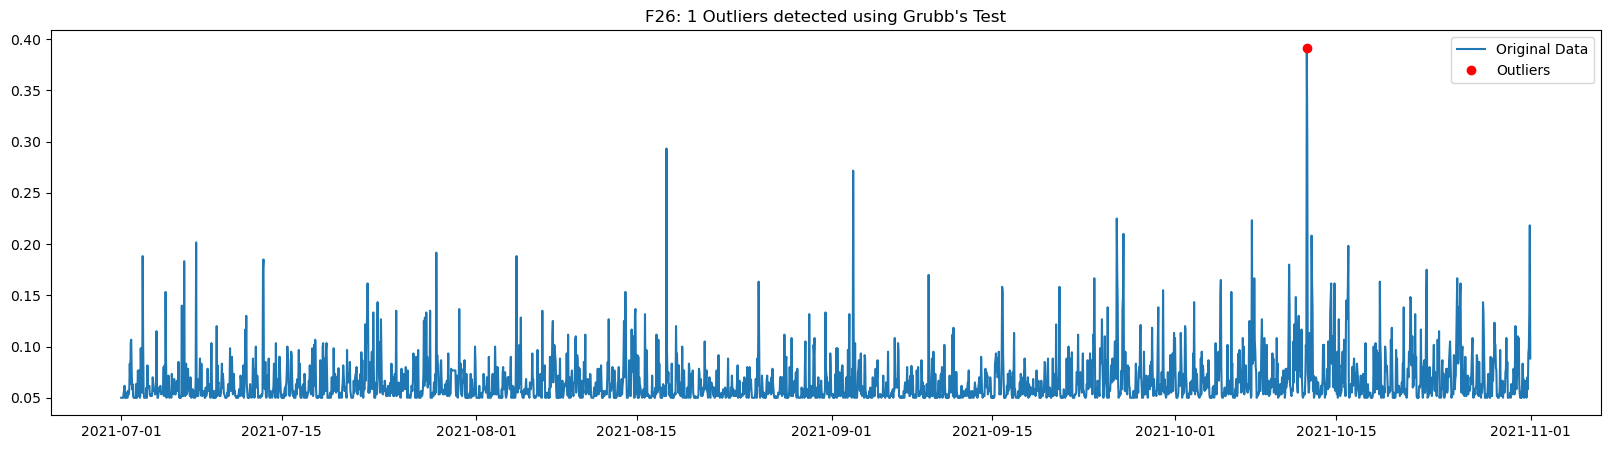

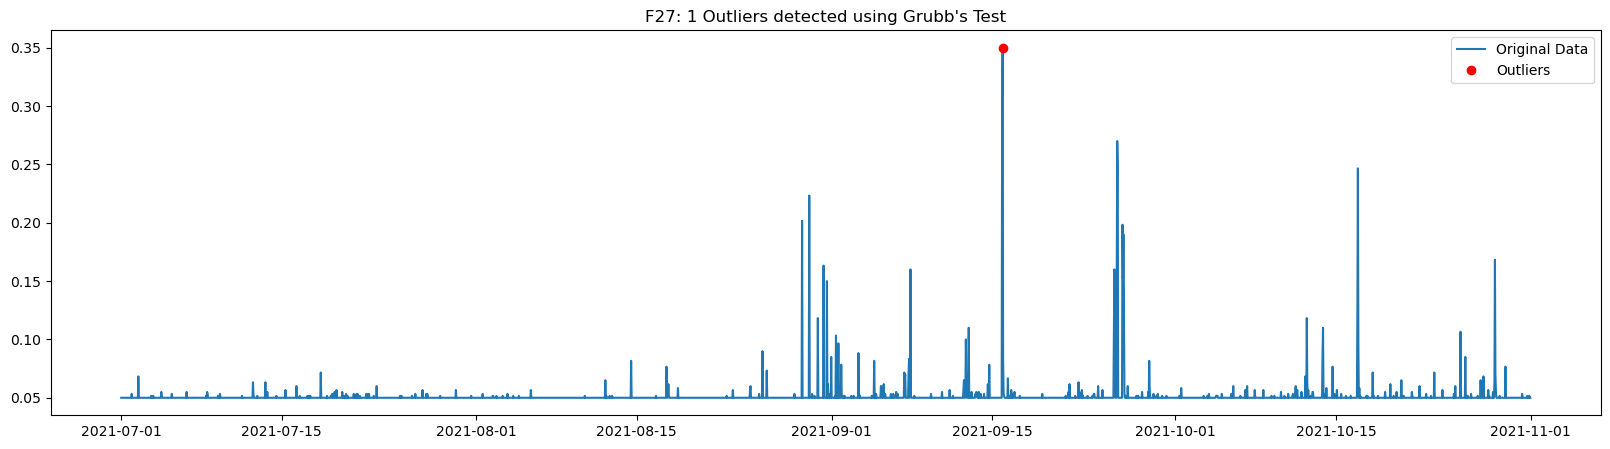

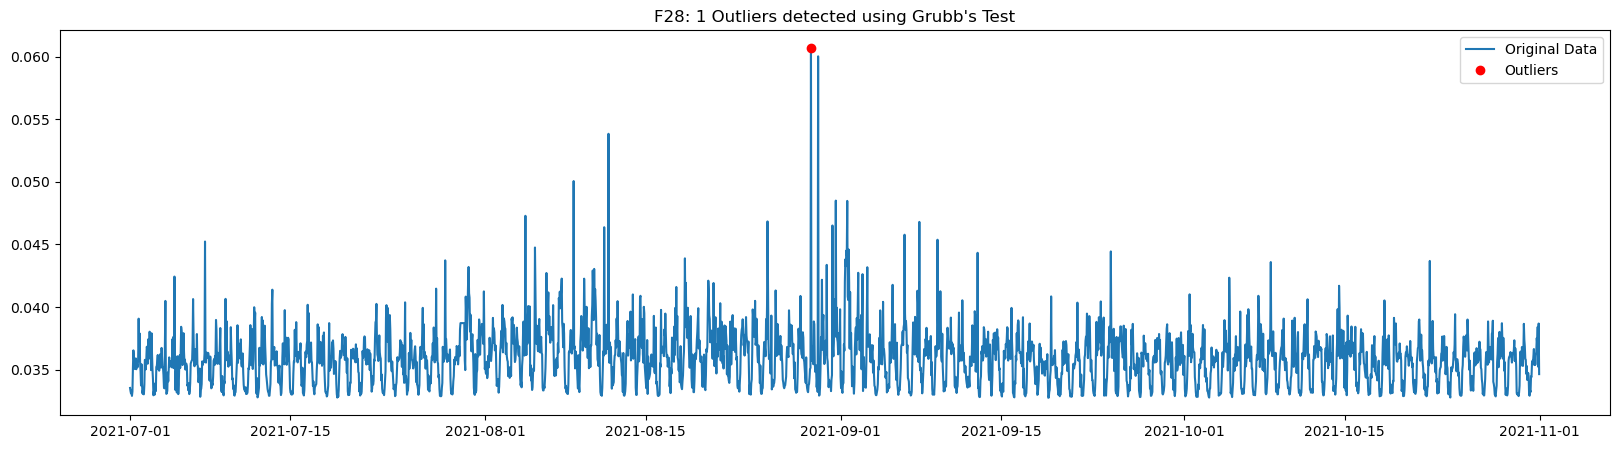

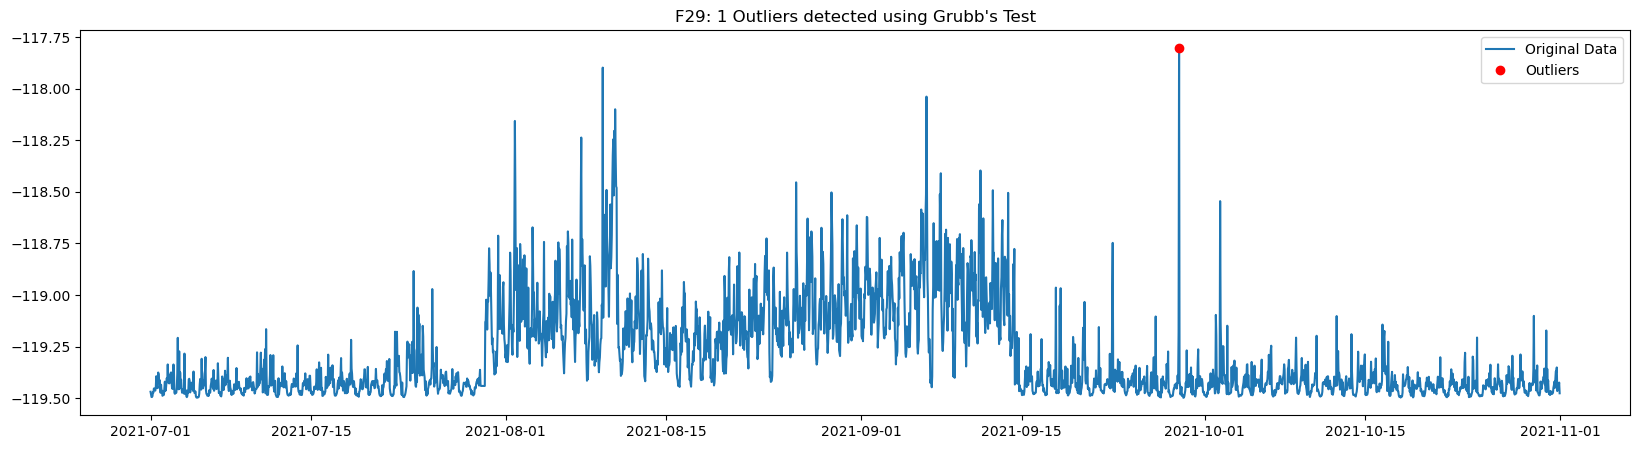

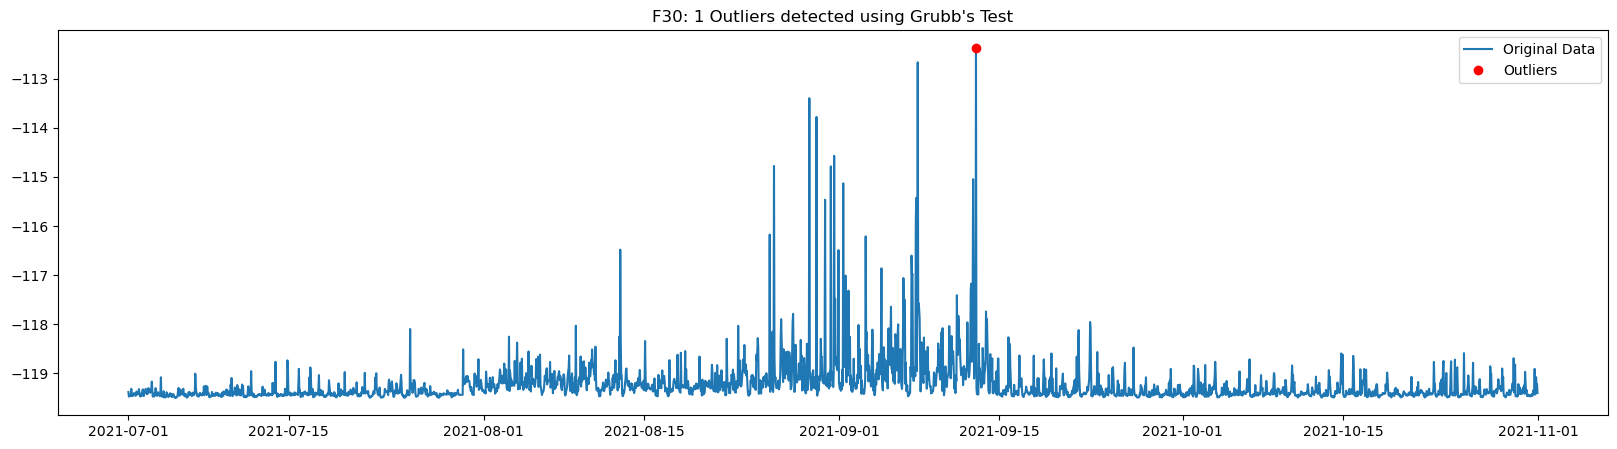

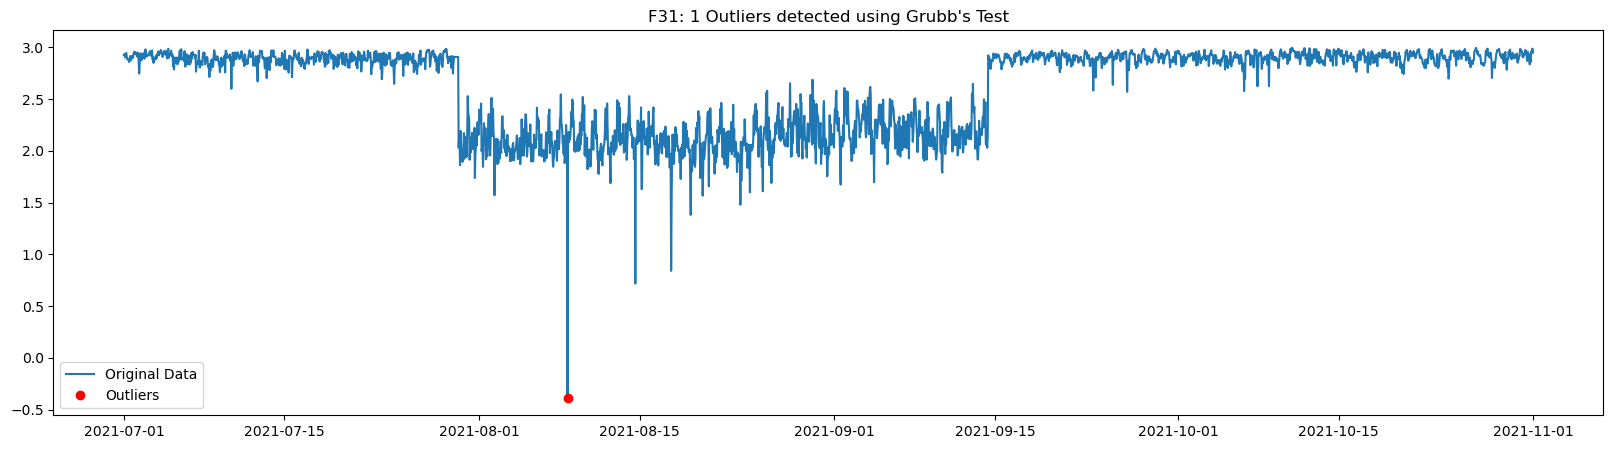

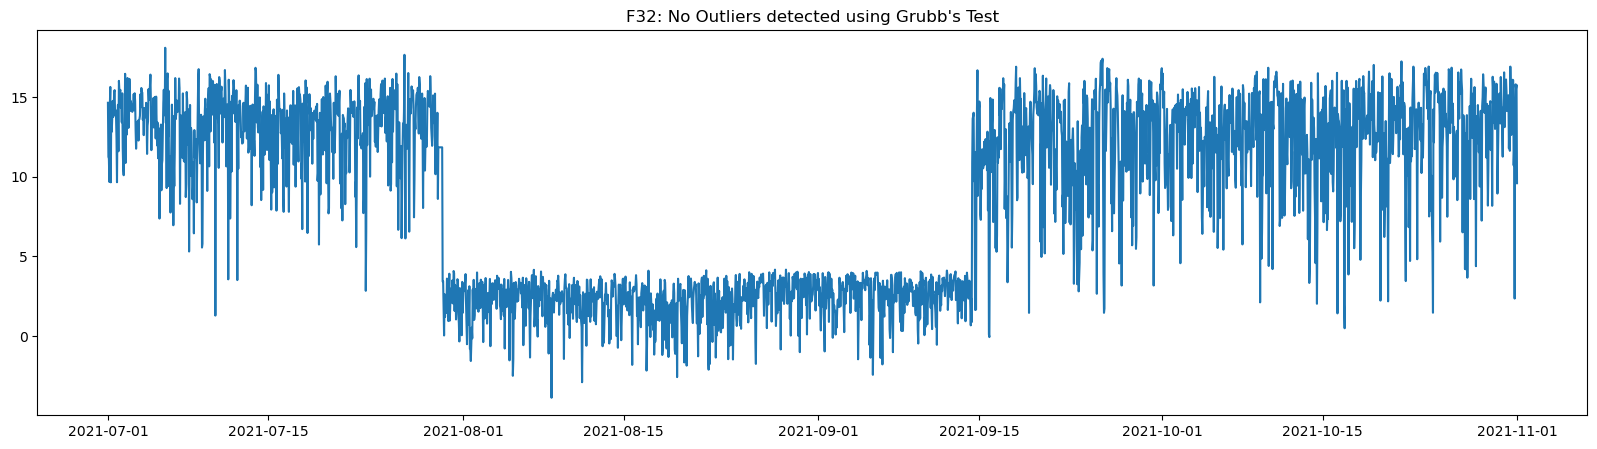

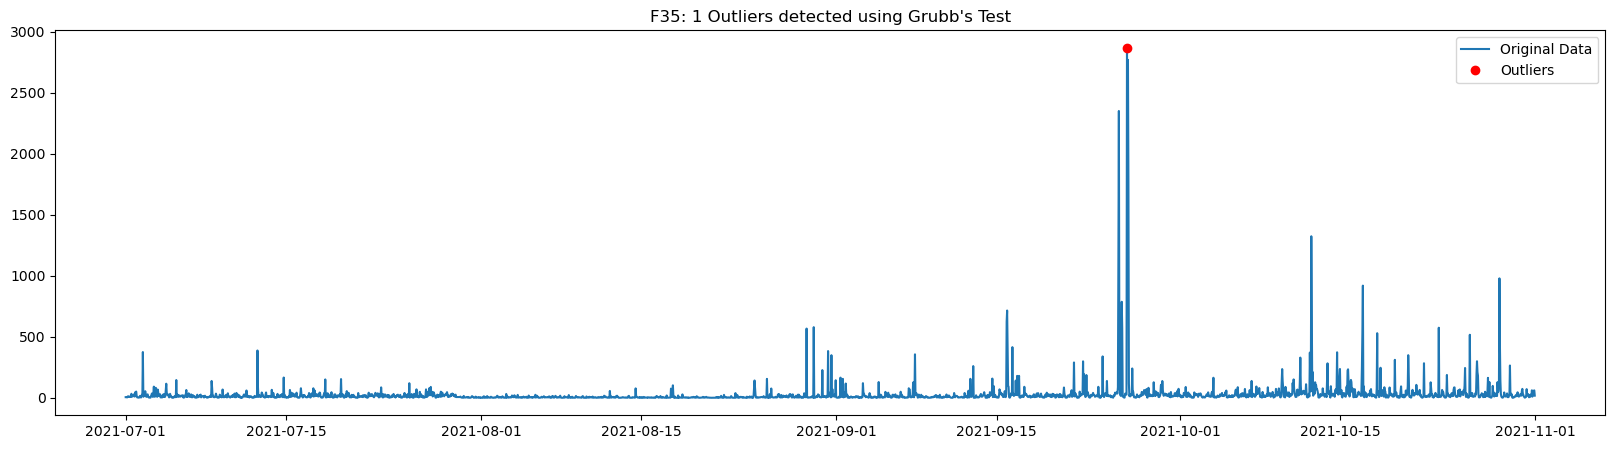

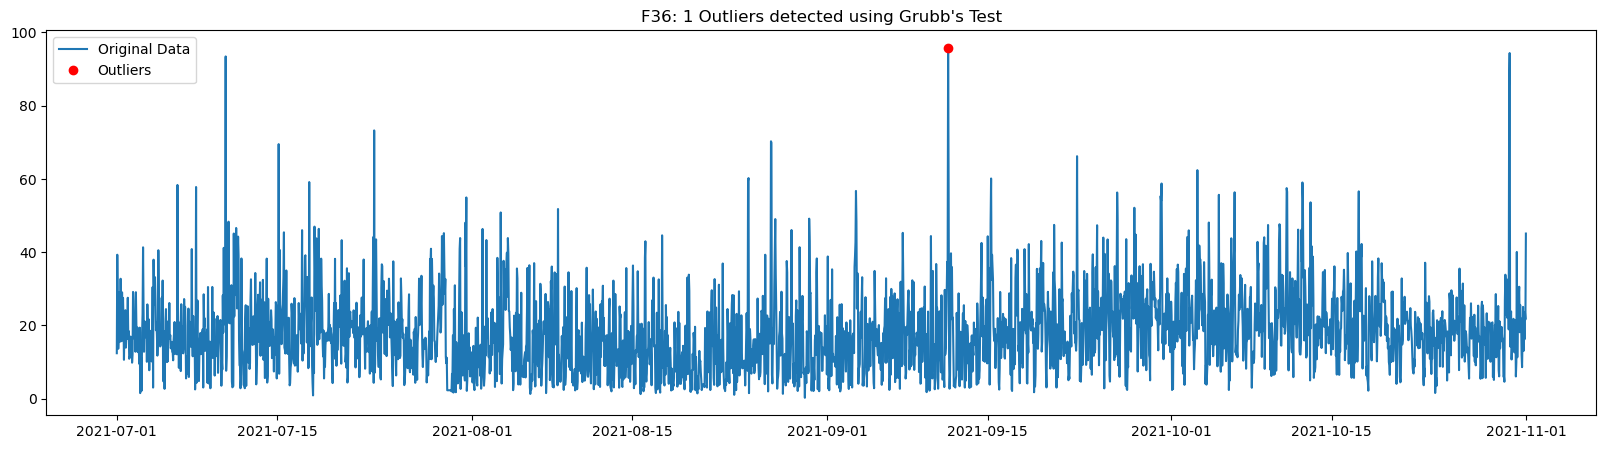

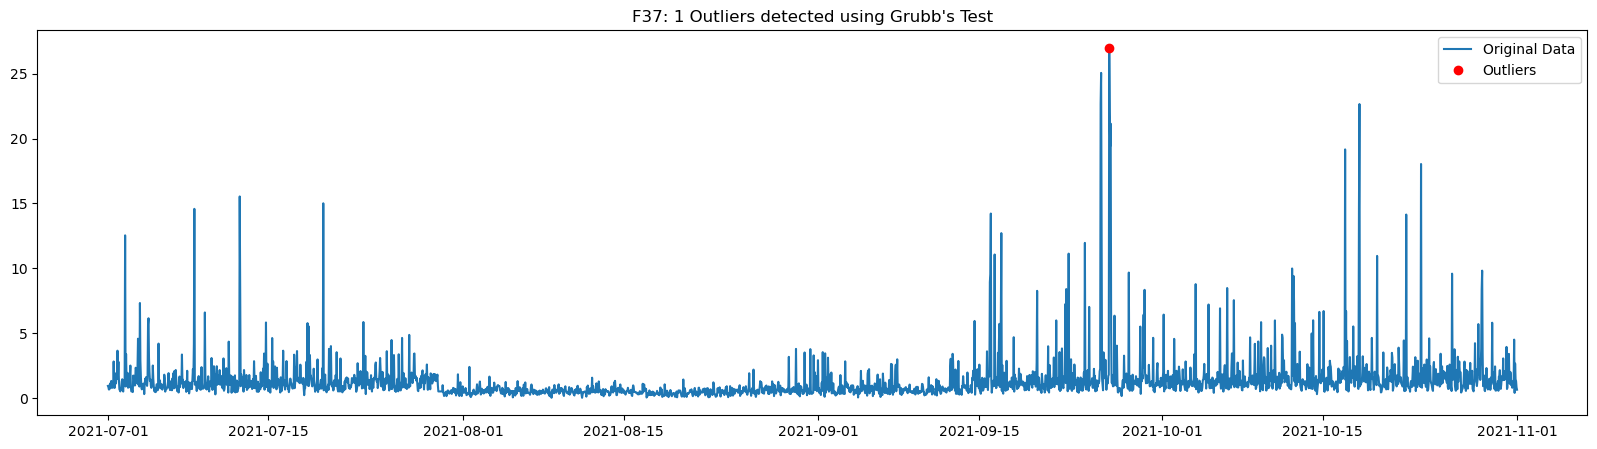

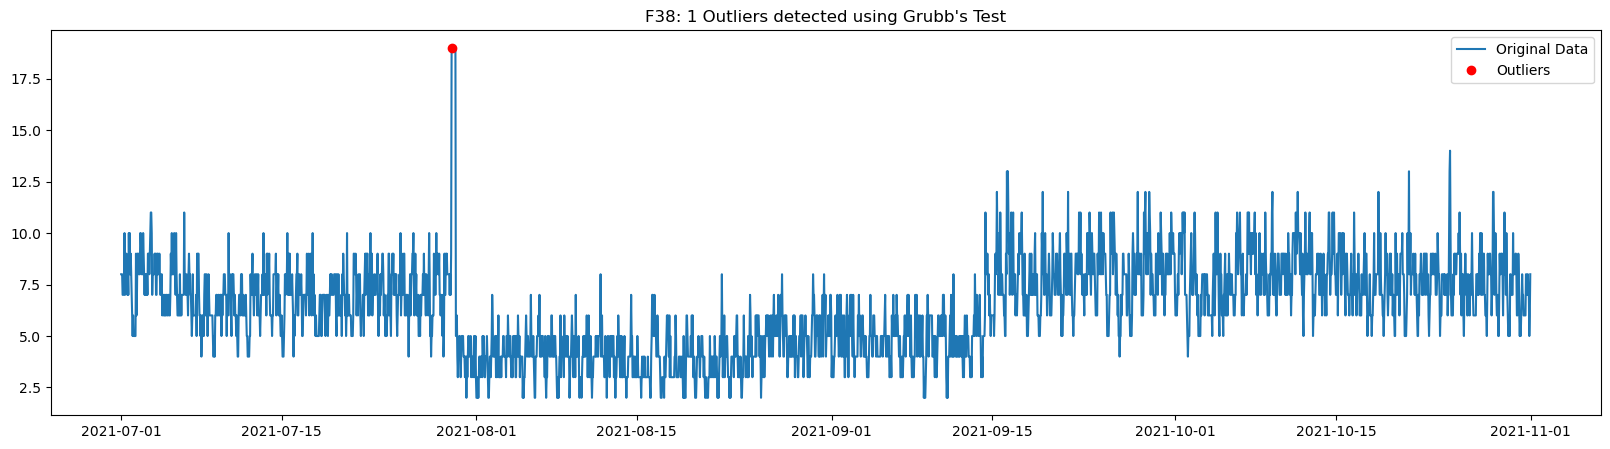

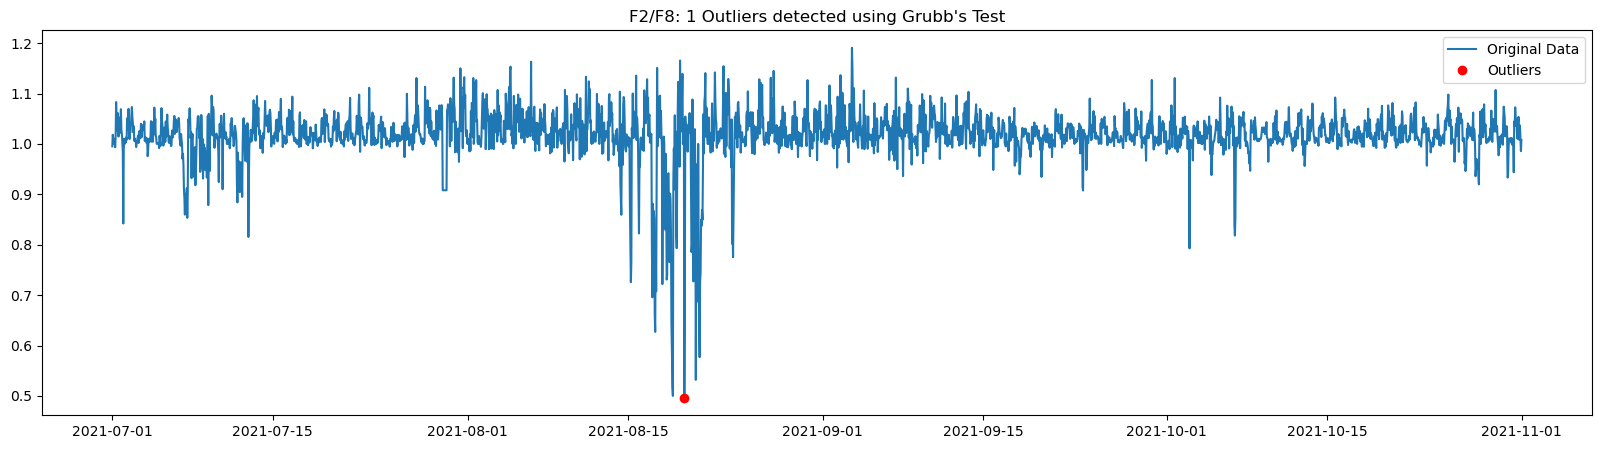

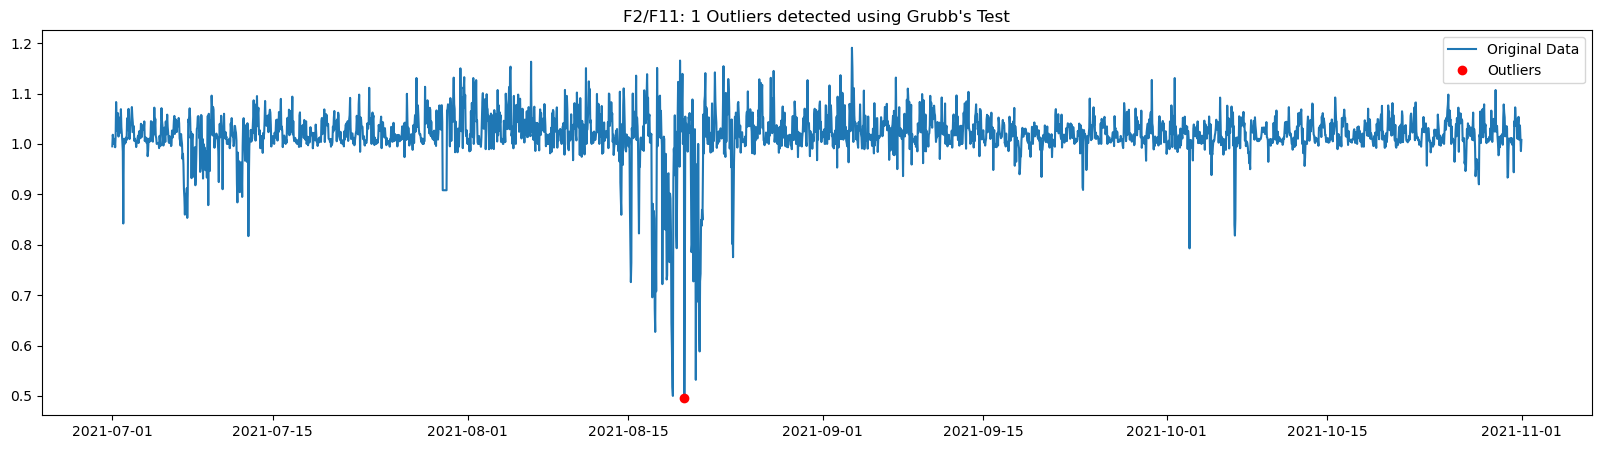

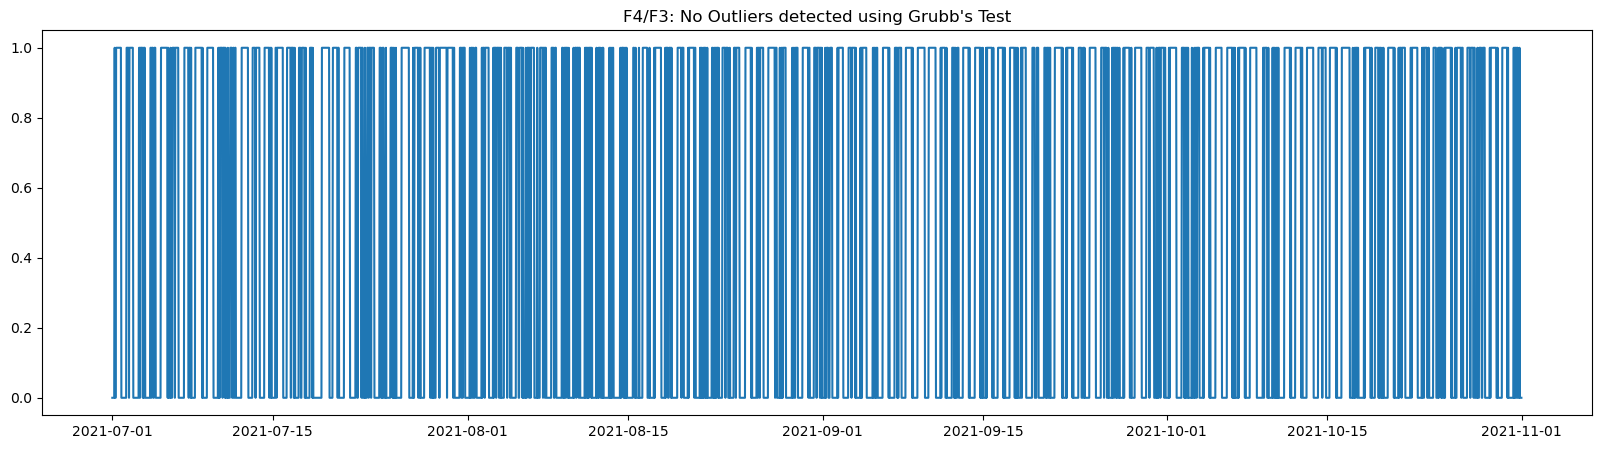

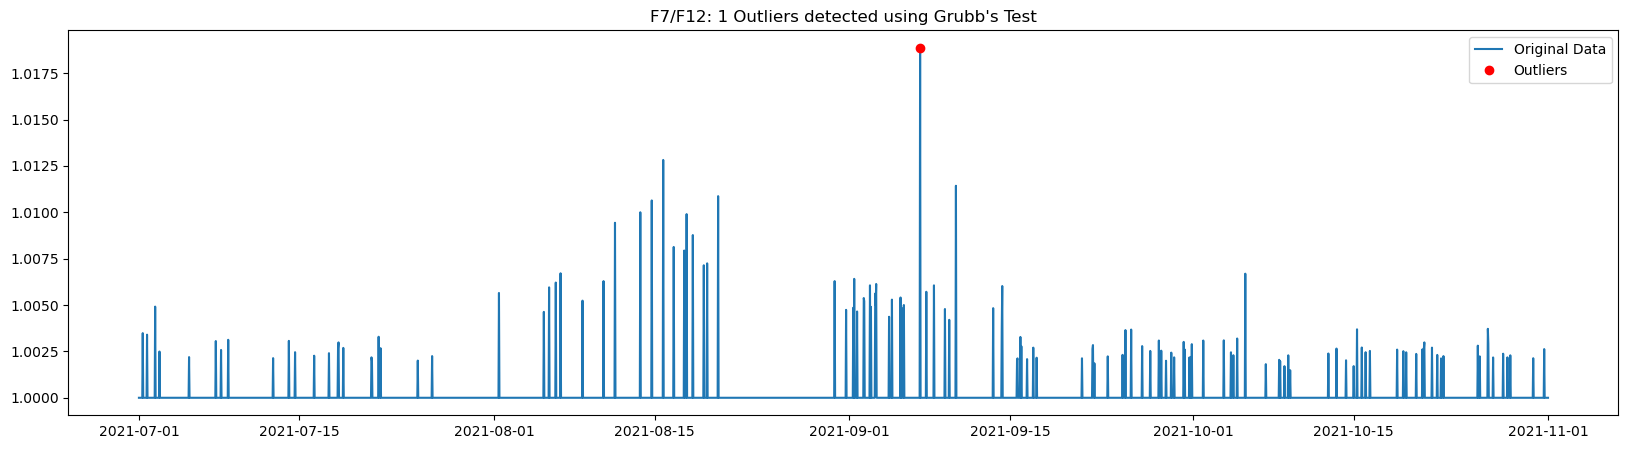

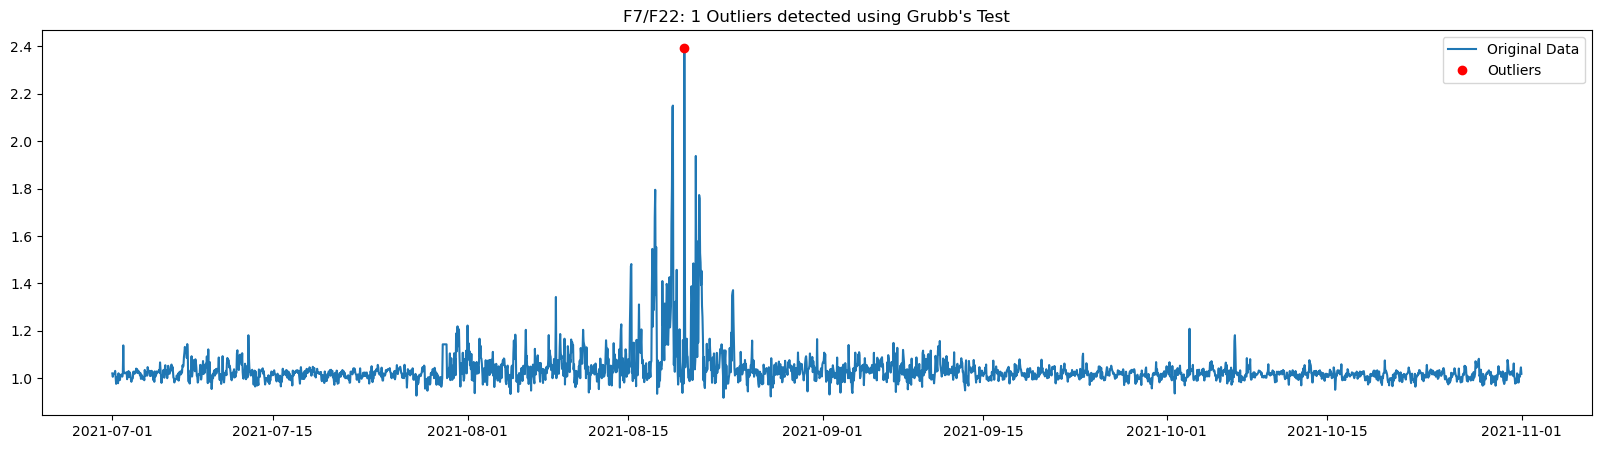

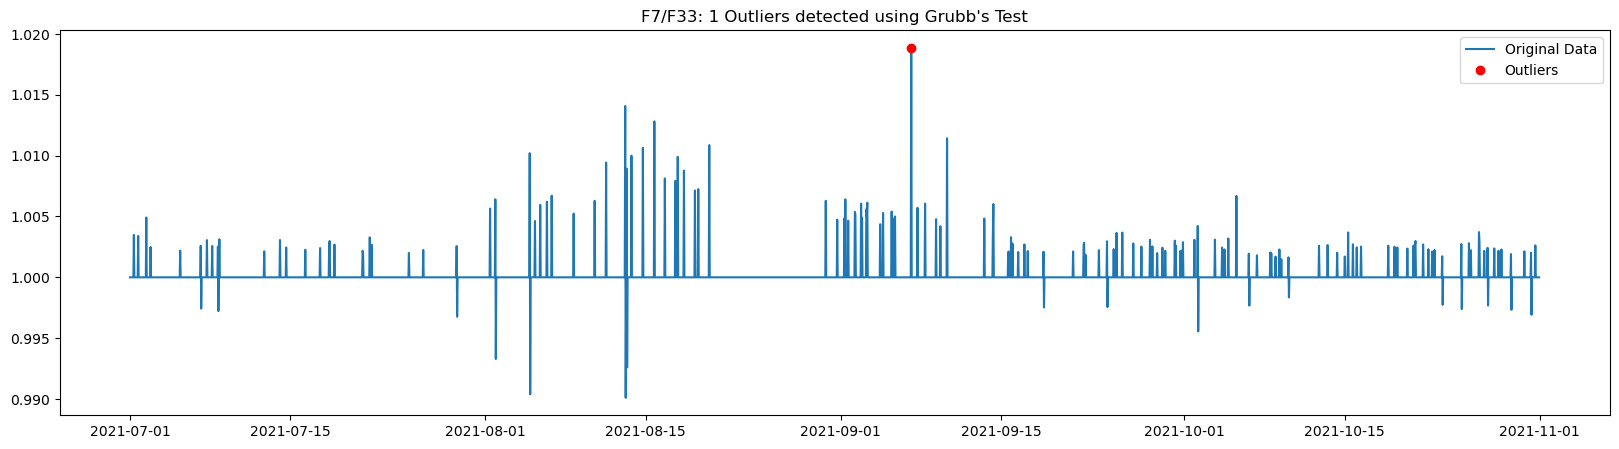

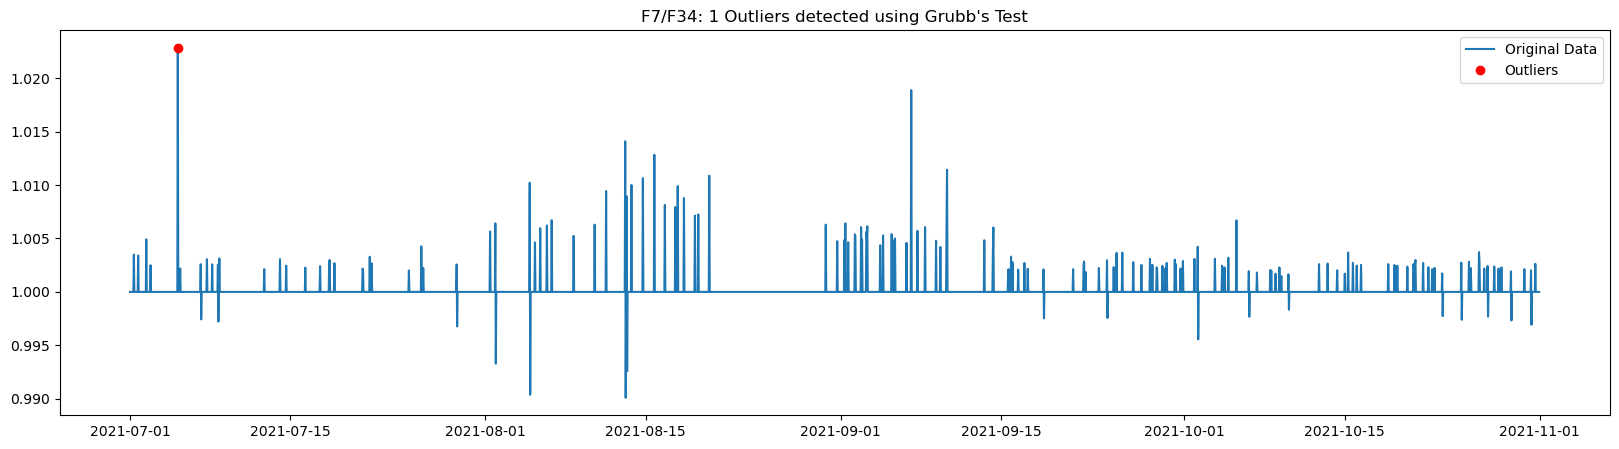

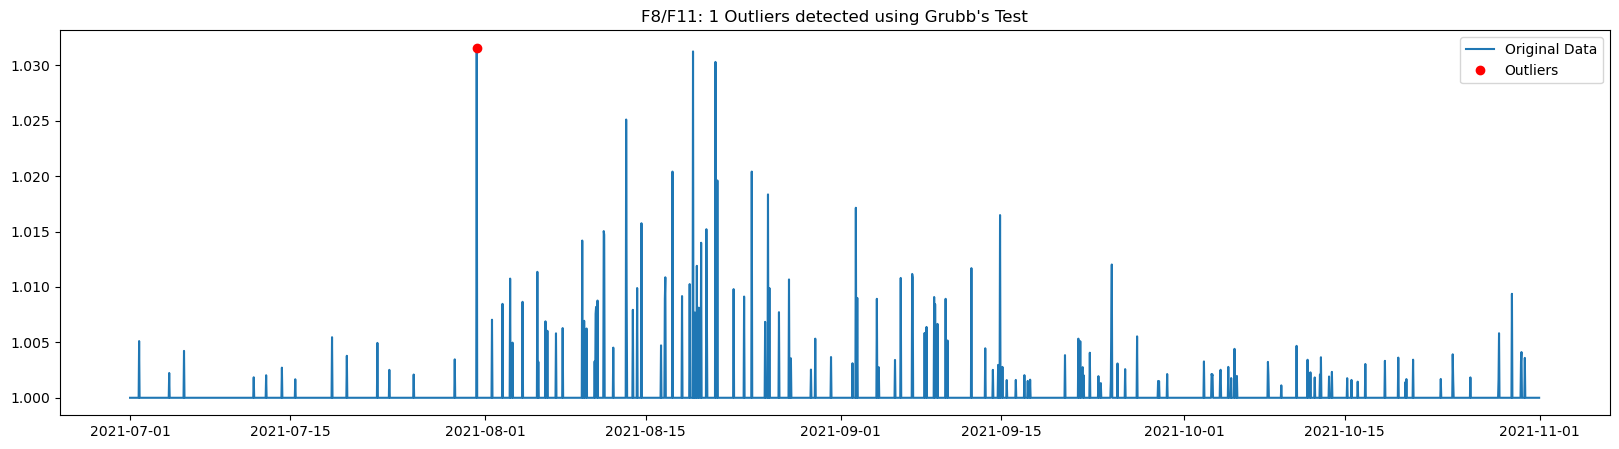

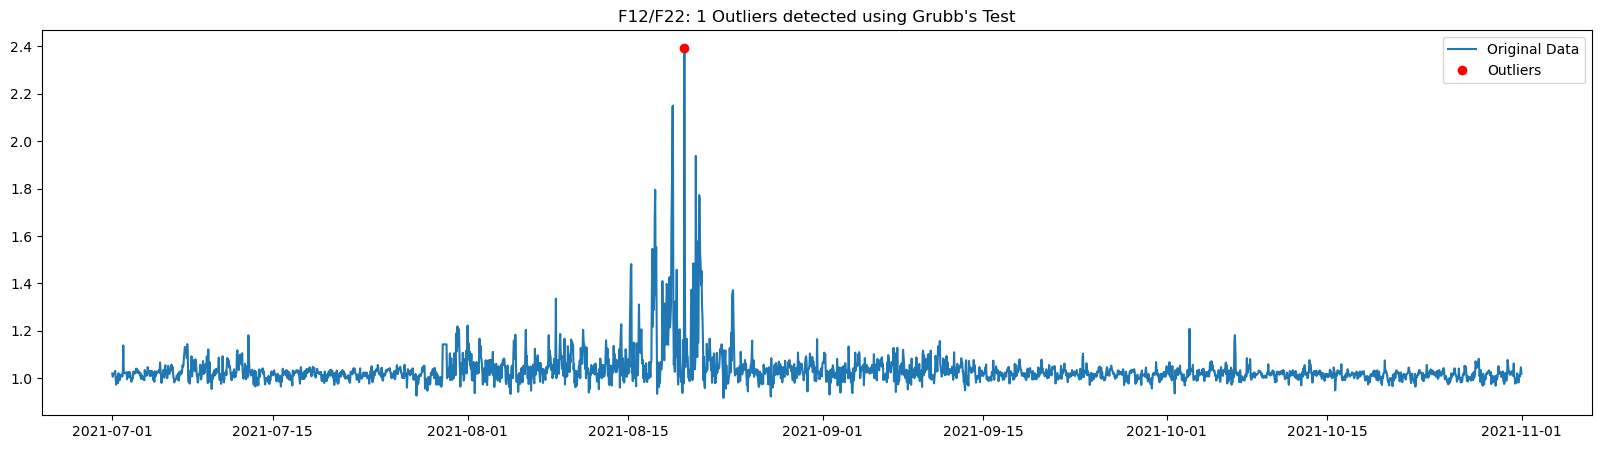

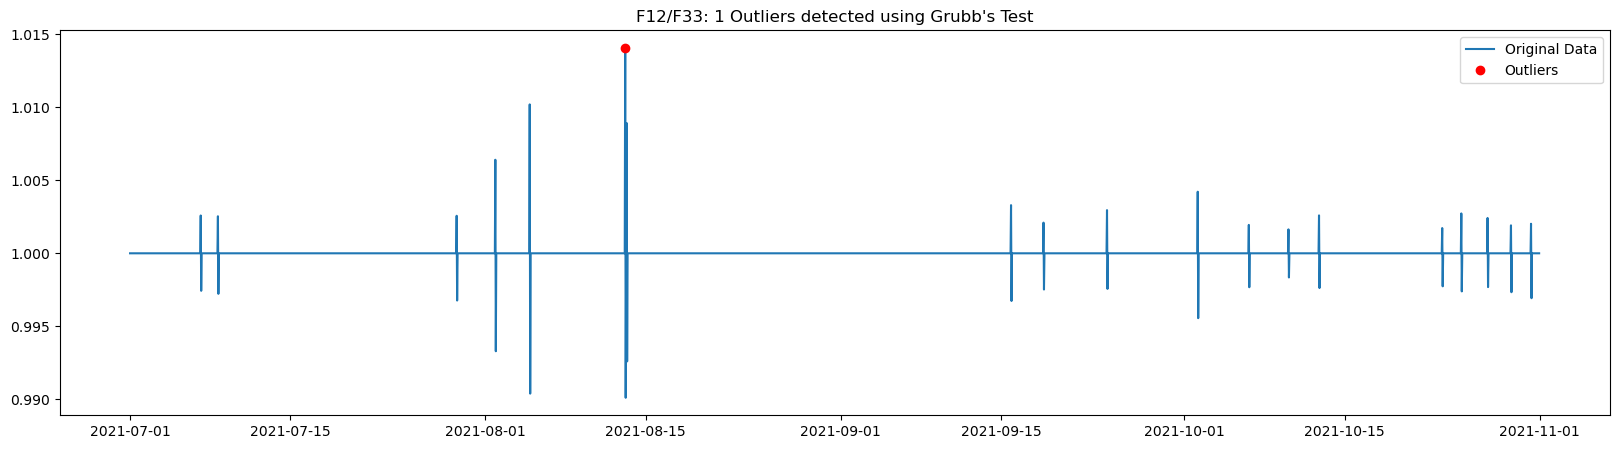

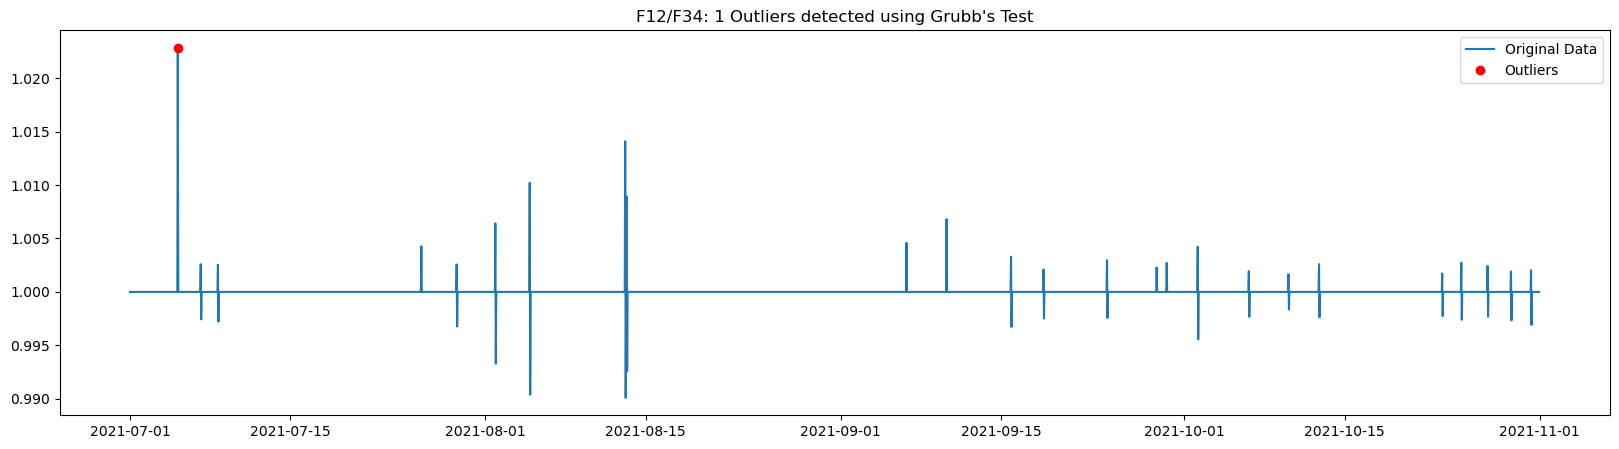

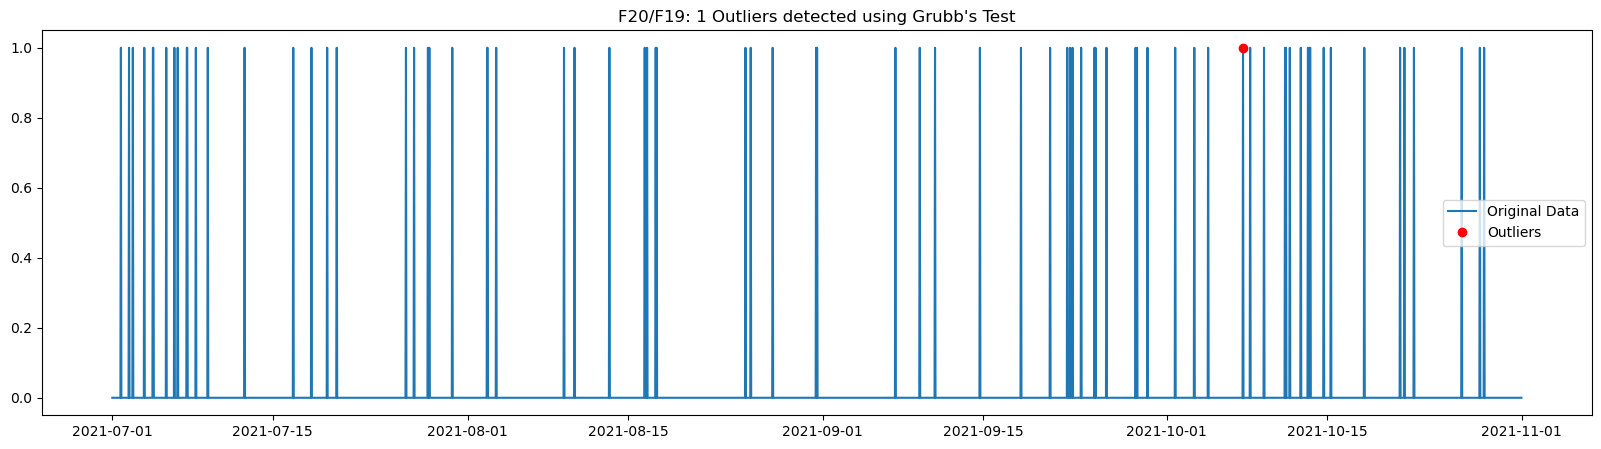

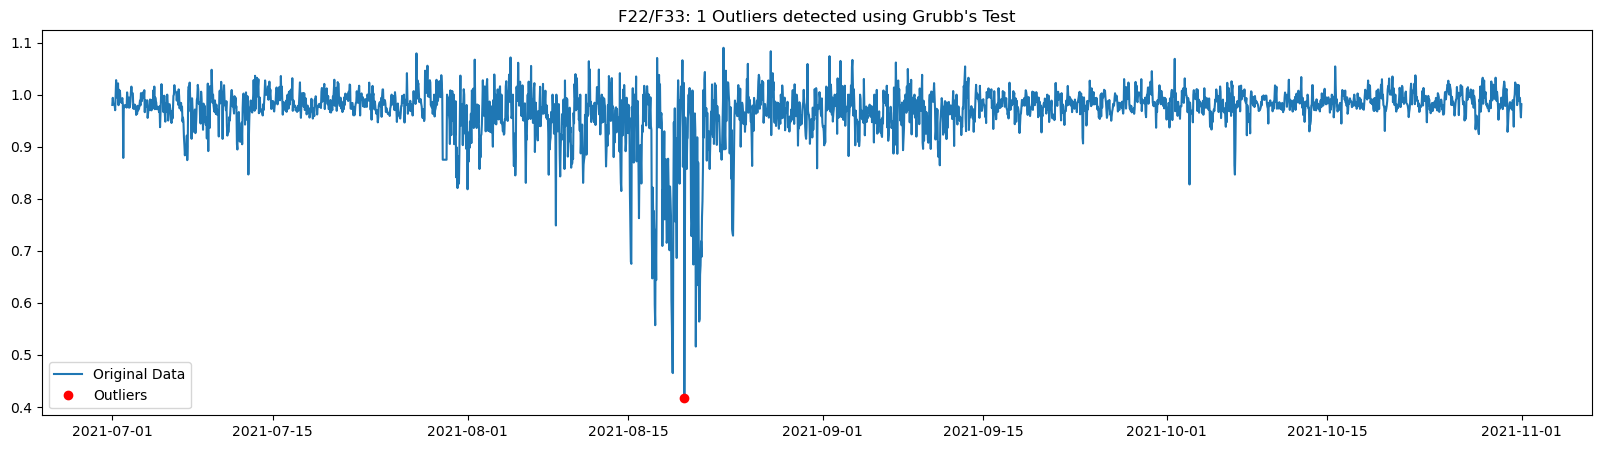

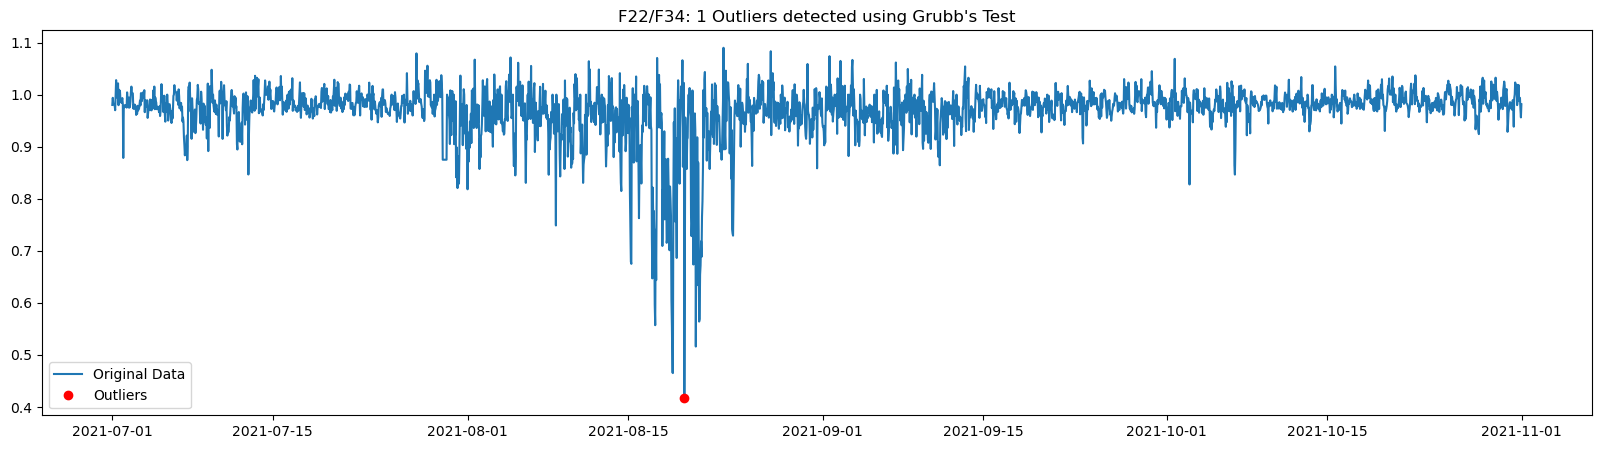

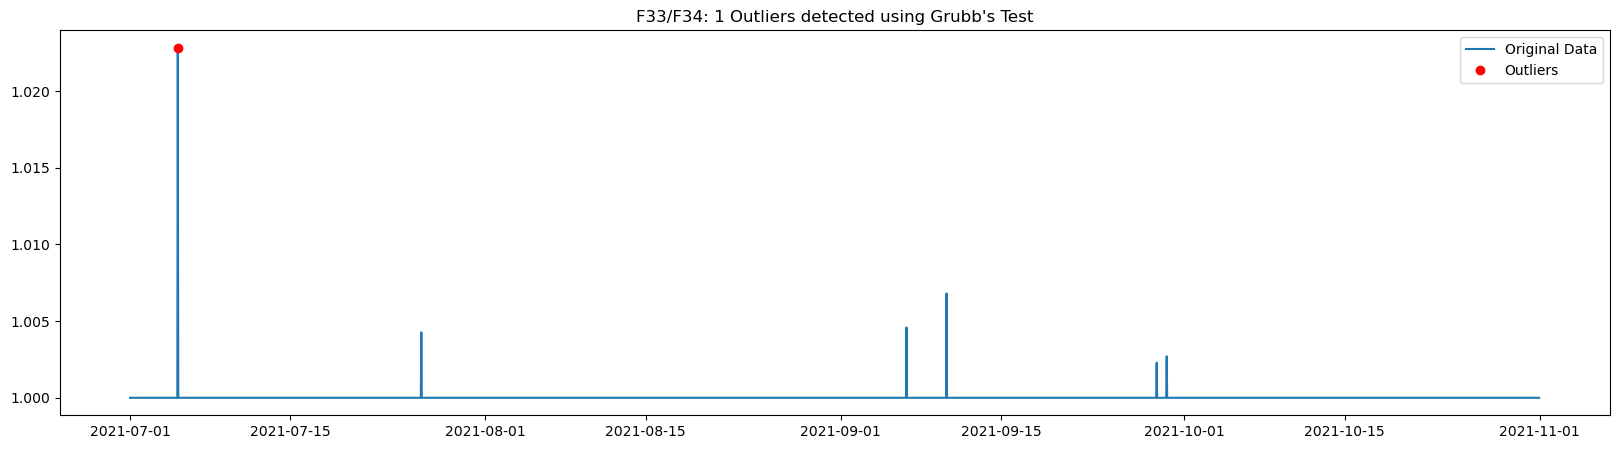

In [12]:
data = pd.read_csv('C:\\Users\\disha\\Downloads\\feature_seln_new123.csv',parse_dates=['START_TIME'])
df=data[data.columns[1:]]
plt.rcParams['figure.figsize'] = [20, 5]
alpha = 0.02
for col in df.columns:
    if col!= 'START_TIME':
        outliers = grubbs_test(df, col, alpha)
        fig, ax = plt.subplots()
        ax.plot(df['START_TIME'], df[col], label='Original Data')
        if outliers:
            ax.plot(df['START_TIME'][outliers], df[col][outliers], 'ro', label='Outliers')
            ax.legend()
            plt.title(f"{col}: {len(outliers)} Outliers detected using Grubb's Test")
        else:
            plt.title(f"{col}: No Outliers detected using Grubb's Test")
        plt.show()